# Reanalysis: The L-$\sigma$ Relation of the HII Galaxies

In [1]:
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = read_csv('../data/lsigma_new.csv')
data.head()

,name,lum,sig,oh,ewhb,ion,te,ne,chb,z,ref,type,class,sigobs,photobs,out
0,UM238,40.024,1.270,7.891,1.554,0.520,4.186,2.938,0.233,0.01427,1,Gaussian Profile,G,FEROS,B&C,0
1,mrk557,40.668,1.761,8.697,0.996,-0.715,4.146,2.573,0.383,0.01328,1,Irregular Profile,I,COUDÉ,B&C,0
2,UM304,41.546,1.893,0.000,0.000,0.000,4.146,2.309,0.000,0.01570,14,Profile with Components,C,COUDÉ,Others,0
3,cts1001,40.810,1.683,7.961,1.775,0.059,4.173,2.927,0.189,0.02263,1,Irregular Profile,I,FEROS,B&C,0
4,UM306,40.245,1.282,8.184,1.375,0.344,4.065,1.423,0.082,0.01649,1,Gaussian Profile,G,FEROS,B&C,0


This data set is the result of long program of dedicated observations using telescopes in Chile (ESO) and Brazil (LNA). The aim was to obtain a statistically significant sample of HII galaxies with a set of homogeneous spectrophotometric data. These data was published and analyzed in [Bordalo & Telles (2011) (BT11)](http://adsabs.harvard.edu/abs/2011ApJ...735...52B). HII galaxies are dwarf and metal-poor (sub-solar) starburst galaxies.

Features are described bellow:

1. **name**: Name of the object identifiable at NED (https://ned.ipac.caltech.edu/).
1. **lum**: Log of the H$\alpha$ luminosity in erg s$^{-1}$.
1. **sig**: Log of the gas velocity dispersion in km s$^{-1}$.
1. **oh**: Gas metallicity in scale of 12 + log (O/H).
1. **ion**: Log of the ionization ratio defined as [OIII]/[OII].
1. **te**: Log of the electronic temperature.
1. **ne**: Log of the electronic density.
1. **chb**: H$\beta$ extinction coefficient in log scale.
1. **z**: Galaxy redshift.
1. **ref**: Spectrophotometric data reference as described in BT11 (Table 3).
1. **type**: Labels for the three classes qualitatively identified in BT11.
1. **class**: Single letter labels for the three classes identified in BT11. G' represents a subsample of galaxies showing Gaussian Profiles that were also quantitatively identified (see Sec. 4.2 in BT11). 
1. **sigobs**: Instruments used in the high-resolution spectroscopic observations to derive the velocity dispersions ($\sigma$): FEROS (ESO/Chile, 1.52m and 2.2m Telescopes) and COUDÉ (LNA/Brazil, 1.6m Telescope). 
1. **photobs**: Labels to easily identify the main references containing the spectrophotometric observations. These references are coded in the **ref** column (see Table 3 in BT11).
1. **out**: Tag for the outliers identified in BT11 (Sec. 4.4).

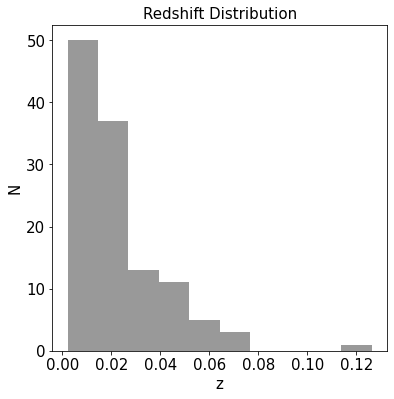

Mean: 0.0222 (95.3 Mpc)
Median: 0.0167 (71.4 Mpc)


In [3]:
plt.figure(figsize=(6,6))
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.hist(data['z'], color='black', alpha = 0.4)
plt.title('Redshift Distribution', size=15)
plt.xlabel('z', size=15)
plt.ylabel('N', size=15)
plt.show()

print('Mean: %.4f (%.1f Mpc)' % (np.mean(data['z']),(
    300000*np.mean(data['z'])/70)))
print('Median: %.4f (%.1f Mpc)' % (np.median(data['z']),(
    300000*np.median(data['z'])/70)))

Same as **Figure** 1 in BT11.

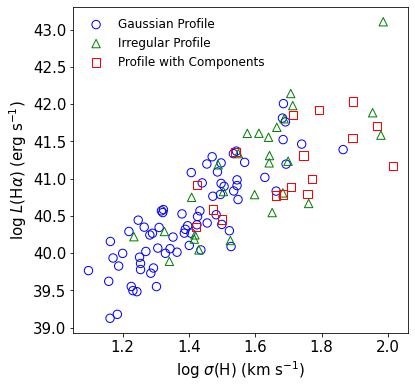

In [4]:
plt.figure(figsize=(6,6))
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
#matplotlib.rc('legend', fontsize=16)

plt.scatter(data[(data['type'] == 'Gaussian Profile') &
                 (data['lum'] > 0)]['sig'],
            data[(data['type'] == 'Gaussian Profile') &
                 (data['lum'] > 0)]['lum'],
            s = 70, edgecolors='blue', marker = 'o', facecolors='none',
            label = 'Gaussian Profile')

plt.scatter(data[(data['type'] == 'Irregular Profile') & 
                 (data['lum'] > 0)]['sig'],
            data[(data['type'] == 'Irregular Profile') & 
                 (data['lum'] > 0)]['lum'],
            s = 70, edgecolors = 'green', marker = '^', facecolors='none',
            label = 'Irregular Profile')

plt.scatter(data[(data['type'] == 'Profile with Components') & 
                 (data['lum'] > 0)]['sig'],
            data[(data['type'] == 'Profile with Components') & 
                 (data['lum'] > 0)]['lum'],
            s = 70, edgecolors = 'red', marker = 's', facecolors='none',
            label = 'Profile with Components')

plt.xlabel(r'log $\sigma$(H) (km s$^{-1}$)', size=15)
plt.ylabel(r'log $L$(H$\alpha$) (erg s$^{-1}$)', size=15)
plt.legend(fontsize=12, frameon= False)
plt.show()

Same as **Figure 6** panel (a) in BT11.

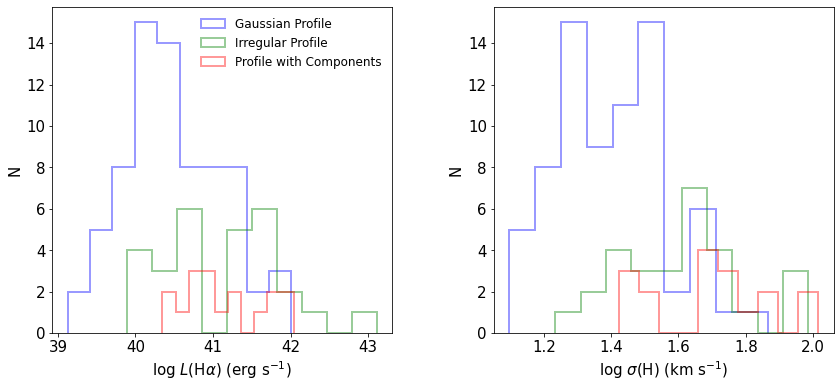

In [5]:
plt.figure(figsize=(14,6))
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

ax1 = plt.subplot(121)
ax1.hist(data[(data['type'] == 'Gaussian Profile') & 
              (data['lum'] > 0)]['lum'],
         color='blue', alpha = 0.4, histtype = 'step', linewidth=2.0,
         label = 'Gaussian Profile')
ax1.hist(data[(data['type'] == 'Irregular Profile') & 
              (data['lum'] > 0)]['lum'],
         color='green', alpha = 0.4, histtype = 'step', linewidth=2.0,
         label = 'Irregular Profile')
ax1.hist(data[(data['type'] == 'Profile with Components') & 
              (data['lum'] > 0)]['lum'],
         color='red', alpha = 0.4, histtype = 'step', linewidth=2.0,
         label = 'Profile with Components')

ax1.set_xlabel(r'log $L$(H$\alpha$) (erg s$^{-1}$)', size=15)
ax1.set_ylabel('N', size=15)
ax1.legend(fontsize=12, frameon= False)

ax2 = plt.subplot(122)
ax2.hist(data[(data['type'] == 'Gaussian Profile') & 
              (data['lum'] > 0)]['sig'],
         color='blue', alpha = 0.4, histtype = 'step', linewidth=2.0,
         label = 'Gaussian Profile')
ax2.hist(data[(data['type'] == 'Irregular Profile') & 
              (data['lum'] > 0)]['sig'],
         color='green', alpha = 0.4, histtype = 'step', linewidth=2.0,
         label = 'Irregular Profile')
ax2.hist(data[(data['type'] == 'Profile with Components') & 
              (data['lum'] > 0)]['sig'],
         color='red', alpha = 0.4, histtype = 'step', linewidth=2.0,
         label = 'Profile with Components')

ax2.set_xlabel(r'log $\sigma$(H) (km s$^{-1}$)', size=15)
ax2.set_ylabel('N', size=15)
plt.subplots_adjust(wspace=0.3)
plt.show()

Same as **Figure 6** panels (b) and (c) in BT11 (different bins).

# Principal Component Analysis

In [6]:
# Subseting

data95 = data[data['ewhb'] > 0][['lum','sig','oh','ewhb','ion','type']]

In [7]:
print(data95.shape)
data95.head()

(95, 6)


,lum,sig,oh,ewhb,ion,type
0,40.024,1.270,7.891,1.554,0.520,Gaussian Profile
1,40.668,1.761,8.697,0.996,-0.715,Irregular Profile
3,40.810,1.683,7.961,1.775,0.059,Irregular Profile
4,40.245,1.282,8.184,1.375,0.344,Gaussian Profile
5,41.196,1.693,8.432,1.353,-0.174,Gaussian Profile


In [8]:
# Preprocessing

X = data95.iloc[:, [0,2,3,4]].values
y = data95.iloc[:, 5].values

# Encoding the types as integers
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

# Standarization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X = pca.fit_transform(X)

print("Amount of variance: %s" % pca.explained_variance_.round(2))
print('Sum: %s'% sum(pca.explained_variance_).round(2))
print("Percentage of variance: %s" % pca.explained_variance_ratio_.round(2))
print('Sum: %s'% sum(pca.explained_variance_ratio_).round(2))

Amount of variance: [2.46 1.11]
Sum: 3.56
Percentage of variance: [0.61 0.27]
Sum: 0.88


Same results are shown in **Table 8** in BT11.

# Logistic Regression (classification attempt)

BT11 identified three classes of HII galaxies based on their emission-line profiles. Let's use here some scikit-learn algorithms in order to test if those classes can be reproduced based on the physical properties. The two principal components obtained above will be used in order to visualize the possible groups in two dimensions.

In [10]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, y)

LogisticRegression(random_state=0)

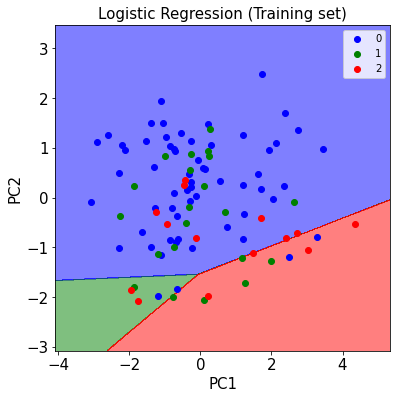

In [11]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap

X_set, y_set = X, y

X1, X2 = np.meshgrid(np.arange(
    start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(
    start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(6,6))
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.contourf(X1, X2, classifier.predict(
    np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('blue', 'green', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('blue', 'green', 'red'))(i), label = j)
plt.title('Logistic Regression (Training set)', size=15)
plt.xlabel('PC1', size=15)
plt.ylabel('PC2', size=15)
plt.legend()
plt.show()

 - solid blue circles (label 0): Gaussian Profile
 - solid green circles (label 1): Irregular Profile
 - solid red circles (label 2): Profile with Components

Galaxies with different emission-line profiles do not define groups (or classes) in the 2D paramenter space represented by the first 2 PCs. Classification based on the physical properties, $L$, O/H, EW(H$\beta$), does not repreduce the one based on emission-line profiles.

# K-Means Clustering (attemped classification)

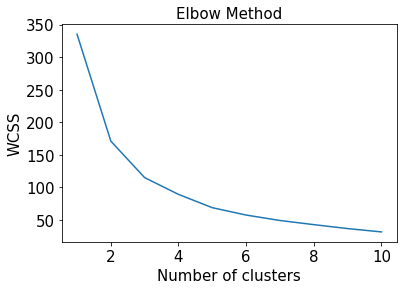

In [12]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method', size=15)
plt.xlabel('Number of clusters', size=15)
plt.ylabel('WCSS', size=15)
plt.show()

Three clusters is a reasonable number of clusters as an input to the K-Means clustering algorithm based. Within-cluster sum of squares (WCSS) metrics was used.

In [13]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

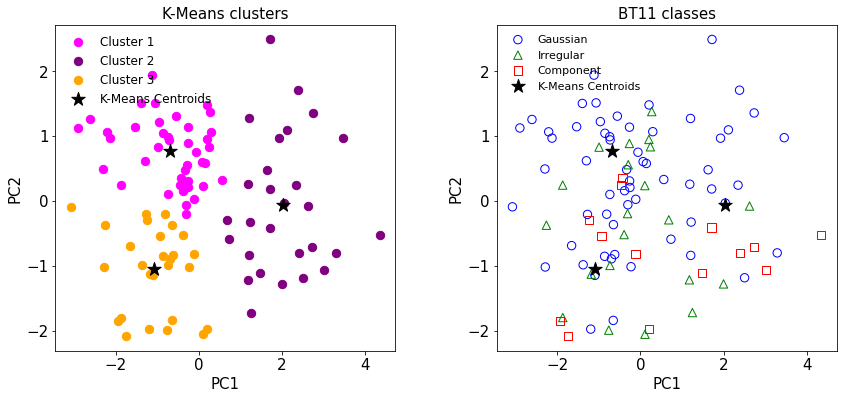

In [14]:
# Visualising the clusters
plt.figure(figsize=(14,6))
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

ax1 = plt.subplot(121)
ax1.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 70,
            c = 'magenta', label = 'Cluster 1')
ax1.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 70,
            c = 'purple', label = 'Cluster 2')
ax1.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 70,
            c = 'orange', label = 'Cluster 3')
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker = '*', s = 200, c = 'black', label = 'K-Means Centroids')

ax1.set_title('K-Means clusters', size=15)
ax1.set_xlabel('PC1', size=15)
ax1.set_ylabel('PC2', size=15)
plt.legend(fontsize=12, frameon= False, loc = 'upper left')

ax2 = plt.subplot(122)
ax2.scatter(X[y == 0, 0], X[y == 0, 1], s = 70, edgecolors = 'blue',
            marker = 'o', facecolors='none', label = 'Gaussian')
ax2.scatter(X[y == 1, 0], X[y == 1, 1], s = 70, edgecolors = 'green',
            marker = '^', facecolors='none', label = 'Irregular')
ax2.scatter(X[y == 2, 0], X[y == 2, 1], s = 70, edgecolors = 'red',
            marker = 's', facecolors='none', label = 'Component')
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker = '*', s = 200, c = 'black', label = 'K-Means Centroids')

ax2.set_title('BT11 classes', size=15)
ax2.set_xlabel('PC1', size=15)
ax2.set_ylabel('PC2', size=15)
plt.legend(fontsize=11, frameon= False, loc = 'upper left')
plt.subplots_adjust(wspace=0.3)
plt.show()

Classification using Logistic Regression and K-Means Clustering were not able to reproduce the classes identified based on the kinematical properties, i.e. the shape of the emission-line profiles. The figure bellow shows examples of H$\alpha$ emission profiles for the three classes identified in BT11.

<img src="../data/classes.png" width="85%">

# To be continued...

In [15]:
data81 = data[(data['sigobs'] == 'FEROS') &
              (data['photobs'] != 'Others')][['lum','sig','oh','ewhb','ion']]
data81.shape

(81, 5)

In [16]:
data53 = data[(data['sigobs'] == 'FEROS') &
              (data['photobs'] != 'Others') &
             (data['type'] == 'Gaussian Profile')][['lum','sig','oh','ewhb',
                                                    'ion']]
data53.shape

(53, 5)

In [17]:
data53.head()

,lum,sig,oh,ewhb,ion
0,40.024,1.270,7.891,1.554,0.520
4,40.245,1.282,8.184,1.375,0.344
6,39.781,1.254,7.918,1.320,-0.046
9,39.127,1.162,8.250,0.635,-0.257
10,40.387,1.499,8.467,1.302,-0.101


In [18]:
from sklearn.linear_model import LinearRegression

X = data53.iloc[:, [1,2]].values
y = data53.iloc[:, 0].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
rms = np.sqrt(sum((y-y_pred)**2)/(len(y)-3))

R^2: 0.80
Intercept: 38.22
log(sigma) Coef.: 4.19
log(O/H) Coef.: -0.44
RMS: 0.289


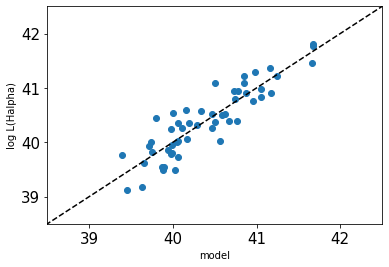

In [19]:
print('R^2: %.2f' % model.score(X,y))
print('Intercept: %.2f'% model.intercept_)
print('log(sigma) Coef.: %.2f' % model.coef_[0])
print('log(O/H) Coef.: %.2f' % model.coef_[1])
print('RMS: %.3f' % rms)

plt.scatter(y_pred, y)
plt.plot((0,50),(0,50), c = 'black', linestyle = 'dashed')
plt.xlabel('model')
plt.ylabel('log L(Halpha)')
plt.xlim(38.5,42.5)
plt.ylim(38.5,42.5)
plt.show()

In [20]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss='squared_loss',
                         residual_threshold=0.12,
                         random_state=0)
ransac.fit(X, y)
y_pred = ransac.predict(X)
rms = np.sqrt(sum((y-y_pred)**2)/(len(y)-3))
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

RMS: 0.296


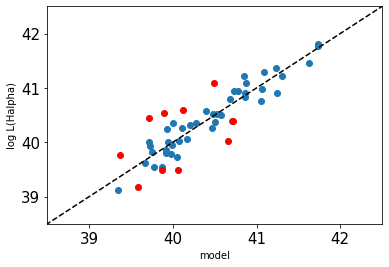

In [21]:
#print('R^2: %.2f' % ransac.score(X,y))
#print('Intercept: %.2f'% ransac.intercept_)
#print('log(sigma) Coef.: %.2f' % ransac.coef_[0])
#print('log(O/H) Coef.: %.2f' % ransac.coef_[1])
print('RMS: %.3f' % rms)

plt.scatter(y_pred[inlier_mask], y[inlier_mask])
plt.scatter(y_pred[outlier_mask], y[outlier_mask], color = 'red')
plt.plot((0,50),(0,50), c = 'black', linestyle = 'dashed')
plt.xlabel('model')
plt.ylabel('log L(Halpha)')
plt.xlim(38.5,42.5)
plt.ylim(38.5,42.5)
plt.show()

In [22]:
data45 = data[(data['sigobs'] == 'FEROS') &
              (data['photobs'] != 'Others') &
             (data['type'] == 'Gaussian Profile') &
             (data['out'] == 0)][['lum','sig','oh','ewhb','ion']]
data45.shape

(45, 5)

In [23]:
data37 = data[(data['sigobs'] == 'FEROS') &
              (data['photobs'] != 'Others') &
             (data['class'] == "G'")][['lum','sig','oh','ewhb','ion']]
data37.shape

(37, 5)